In [34]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Import data
data = pd.read_csv('marketing_campaign.csv', delimiter='\t')

#Check data size
data.shape

(2240, 29)

In [3]:
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


### Data Pre-processing

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [6]:
data.dropna(inplace = True)

In [7]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [10]:
data["Age"] = 2023 - data["Year_Birth"]
data["Age"] 

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

In [11]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [12]:
data.drop(['Year_Birth', 'Kidhome', 'Teenhome'], axis=1, inplace=True)

data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173
MntFruits,88,1,49,4,43
MntMeatProducts,546,6,127,20,118
MntFishProducts,172,2,111,10,46


In [13]:
data.corr()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children
ID,1.000000,0.013095,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,...,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491,-0.002355,-0.000957
Income,0.013095,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,...,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047,0.161791,-0.293352
Recency,-0.044376,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,...,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766,0.016295,0.018290
MntWines,-0.021084,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,...,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299,0.159451,-0.353748
MntFruits,0.007326,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,...,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443,0.017747,-0.395901
MntMeatProducts,-0.005902,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,...,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746,0.033697,-0.504545
MntFishProducts,-0.023992,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,...,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145,0.040425,-0.427841
MntSweetProducts,-0.005936,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,...,0.029313,0.259230,0.245102,0.010188,-0.022641,NaN,NaN,0.116170,0.020204,-0.389411
MntGoldProds,-0.011172,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,...,0.024015,0.181397,0.170132,0.050734,-0.031133,NaN,NaN,0.140332,0.064208,-0.268918
NumDealsPurchases,-0.040612,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,...,0.016077,-0.184253,-0.127374,-0.037981,0.000497,NaN,NaN,0.003451,0.058668,0.436076


In [14]:
len(data.Z_CostContact.unique())

1

In [15]:
len(data.Z_Revenue.unique())

1

In [16]:
data['Accepted_Campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']


In [17]:
data.drop(["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue", "AcceptedCmp1", "AcceptedCmp2",
           "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], axis=1, inplace = True)

In [18]:
data.head().T

,0,1,2,3,4
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58,38,26,26,94
MntWines,635,11,426,11,173
MntFruits,88,1,49,4,43
MntMeatProducts,546,6,127,20,118
MntFishProducts,172,2,111,10,46
MntSweetProducts,88,1,21,3,27
MntGoldProds,88,6,42,5,15


In [19]:
cs = data.copy()

In [20]:
cs.dtypes

Education               object
Marital_Status          object
Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Children                 int64
Accepted_Campaigns       int64
dtype: object

In [21]:
cs['Accepted_Campaigns'].value_counts()

0    1757
1     323
2      81
3      44
4      11
Name: Accepted_Campaigns, dtype: int64

In [22]:
cs['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
cs['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [24]:
cs = pd.get_dummies(cs)
cs.head().T

,0,1,2,3,4
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58.0,38.0,26.0,26.0,94.0
MntWines,635.0,11.0,426.0,11.0,173.0
MntFruits,88.0,1.0,49.0,4.0,43.0
MntMeatProducts,546.0,6.0,127.0,20.0,118.0
MntFishProducts,172.0,2.0,111.0,10.0,46.0
MntSweetProducts,88.0,1.0,21.0,3.0,27.0
MntGoldProds,88.0,6.0,42.0,5.0,15.0
NumDealsPurchases,3.0,2.0,1.0,2.0,5.0
NumWebPurchases,8.0,1.0,8.0,2.0,5.0


In [25]:
corr = cs.corr()
corr

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,...,0.011827,0.081552,0.024026,-0.012374,0.007975,-0.016479,-0.025843,0.023425,0.031706,-0.004556
Recency,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,...,-0.026004,-0.008248,0.004141,-0.023763,0.005606,-0.019268,0.003356,0.019933,-0.001367,-0.047783
MntWines,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,...,0.036722,0.159450,0.004492,-0.013147,0.020029,-0.012330,-0.021198,0.005799,0.034667,0.001507
MntFruits,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,...,-0.055592,-0.082192,0.043925,-0.020689,0.009203,-0.014117,0.011819,-0.012694,0.026111,-0.017644
MntMeatProducts,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,...,-0.008071,0.006439,0.019503,-0.023097,-0.025604,-0.021602,0.041365,-0.001446,0.015408,-0.015682
MntFishProducts,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,...,-0.049846,-0.103501,0.092167,-0.020159,-0.016208,-0.031493,0.010774,0.015375,0.042243,-0.018469
MntSweetProducts,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,...,-0.067272,-0.085676,0.002541,-0.017959,-0.001748,-0.005365,0.000548,-0.011459,0.049746,-0.017588
MntGoldProds,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,...,-0.032370,-0.117515,0.092849,-0.012058,0.015338,-0.017158,-0.006614,-0.008716,0.043253,-0.001140
NumDealsPurchases,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,...,0.023343,0.009886,-0.005056,0.025712,0.019876,0.024433,-0.051843,0.001395,0.003107,0.041826
NumWebPurchases,0.387878,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,...,-0.008049,0.066700,-0.006419,0.012290,0.028084,-0.000031,-0.044346,0.003810,0.036663,0.031968


In [26]:
sorted = corr.abs().unstack().sort_values(ascending=False)
sorted

Income                   Income                     1.000000
Children                 Children                   1.000000
MntFruits                MntFruits                  1.000000
MntMeatProducts          MntMeatProducts            1.000000
MntFishProducts          MntFishProducts            1.000000
                                                      ...   
Education_Graduation     Marital_Status_Absurd      0.000217
NumCatalogPurchases      Marital_Status_Divorced    0.000162
Marital_Status_Divorced  NumCatalogPurchases        0.000162
NumWebPurchases          Marital_Status_Married     0.000031
Marital_Status_Married   NumWebPurchases            0.000031
Length: 961, dtype: float64

In [27]:
# Scaling features
scaler=StandardScaler()
scaler.fit(cs)
scaled_cs=pd.DataFrame(scaler.transform(cs),columns=cs.columns)
print('All features are now scaled!')

All features are now scaled!


### Clustering Model

In [28]:
#Create a K-means model
kmeans = KMeans(n_clusters=4)

In [29]:
#Fit model to the data
kmeans.fit(cs)

C:\Users\AMINAT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [30]:
#Get Cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [31]:
# Add cluster labels to the original data
cs['Cluster'] = kmeans.labels_

In [32]:
sns.set_style("whitegrid")

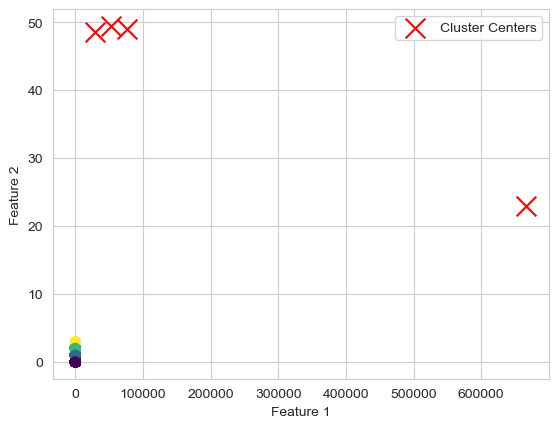

In [33]:
plt.scatter(cs['Cluster'], cs['Cluster'], c=labels, cmap='viridis', s=50)
# Plot the cluster centers as well
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()
